# 调用高德Web服务API文档内容

- 完成每一个模块中的一个子功能的API调用

## 地理/逆地理编码

In [9]:
import pandas as pd
import requests
key_xu ="f49e1317bfd8f3f01e6c4f7a4037fd5c"

- 获取地理编码

In [10]:
# A-1 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_xu,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
油校 = geocode(address='广东省茂名市石油化工学院')
print(油校)
df_油校地理编码 = pd.json_normalize(油校['geocodes'])
display(df_油校地理编码)
油校地理编码 = 油校['geocodes'][0]['location']
print("油校地理编码:",油校地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省茂名市茂南区茂名市石油化工学院', 'country': '中国', 'province': '广东省', 'citycode': '0668', 'city': '茂名市', 'district': '茂南区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440902', 'street': [], 'number': [], 'location': '110.922062,21.675673', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省茂名市茂南区茂名市石油化工学院,中国,广东省,0668,茂名市,茂南区,[],440902,[],[],"110.922062,21.675673",兴趣点,[],[],[],[]


油校地理编码: 110.922062,21.675673


- 逆地理编码

In [20]:
# A-2 基础逆地理编码分析
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_xu,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

油校逆地理编码_base = regeocode(油校地理编码)
print(油校逆地理编码_base)
df_油校逆地理编码 = pd.json_normalize(油校逆地理编码).T
display(df_油校逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '茂名市', 'province': '广东省', 'adcode': '440902', 'district': '茂南区', 'towncode': '440902006000', 'streetNumber': {'number': '170号', 'location': '110.922075,21.6757156', 'direction': '北', 'distance': '4.91479', 'street': '官渡二路'}, 'country': '中国', 'township': '官渡街道', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0668'}, 'formatted_address': '广东省茂名市茂南区官渡街道官渡二路170号广东石油化工学院官渡校区'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,茂名市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440902
regeocode.addressComponent.district,茂南区
regeocode.addressComponent.towncode,440902006000
regeocode.addressComponent.streetNumber.number,170号
regeocode.addressComponent.streetNumber.location,"110.922075,21.6757156"


In [21]:
油校逆地理编码_all = regeocode(油校地理编码,extensions="all")
print(油校逆地理编码_all)
df_油校逆地理编码_all = pd.json_normalize(油校逆地理编码_all)
display(df_油校逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0668F49F028024886', 'location': '110.922,21.6757', 'direction': '西', 'name': '官渡二路', 'distance': '30.2607'}, {'id': '0668F49F0280242725', 'location': '110.922,21.6753', 'direction': '北', 'name': '文东街', 'distance': '42.5997'}, {'id': '0668F49F0280241069', 'location': '110.921,21.6757', 'direction': '东', 'name': '官渡南路', 'distance': '135.718'}], 'roadinters': [{'second_name': '官渡二路', 'first_id': '0668F49F0280241069', 'second_id': '0668F49F028024886', 'location': '110.9207486,21.67566556', 'distance': '135.718', 'first_name': '官渡南路', 'direction': '东'}], 'formatted_address': '广东省茂名市茂南区官渡街道官渡二路170号广东石油化工学院官渡校区', 'addressComponent': {'city': '茂名市', 'province': '广东省', 'adcode': '440902', 'district': '茂南区', 'towncode': '440902006000', 'streetNumber': {'number': '170号', 'location': '110.922075,21.6757156', 'direction': '北', 'distance': '4.91479', 'street': '官渡二路'}, 'country': '中国', 'township': '官渡街道', 'businessAreas': [[]], 'building': {'name': [],

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0668F49F028024886', 'location': '110....","[{'second_name': '官渡二路', 'first_id': '0668F49F...",广东省茂名市茂南区官渡街道官渡二路170号广东石油化工学院官渡校区,茂名市,广东省,440902,茂南区,...,中国,官渡街道,[[]],[],[],[],[],0668,"[{'area': '238542.459332', 'type': '141201', '...","[{'id': 'B029C023KF', 'direction': '西北', 'busi..."


### 思考

- 地理编码将数据移植到空间坐标系中，这个过程包括对数据的准确分类和注册，以及使所有的数据能够与一个空间坐标系建立关联，从而保证数据库中的每一个对象被准确无误地叠加在地图上。通过丰富的标准地址库中的数据，地理编码可以帮助用户在进行移动端查询、商业分析、规划分析等领域创造无限价值。我认为它是具备ML、AI的功能的。

---
## 路径规划（步行）

In [22]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_xu,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
东汇城 = geocode('广东省茂名市茂南区东汇城')
东汇城_location = 东汇城['geocodes'][0]['location']
油校_location = 油校['geocodes'][0]['location']
print("(起点)油校_location:",油校_location,"(终点)东汇城_location:",东汇城_location)

(起点)油校_location: 110.922062,21.675673 (终点)东汇城_location: 110.948725,21.664069


In [23]:
油校_东汇城 = walking(油校_location,东汇城_location)
df_步行路径规划 = pd.json_normalize(油校_东汇城["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,沿官渡二路向东步行230米直行,东,官渡二路,230,184,"110.922057,21.675634;110.922995,21.675621;110....",直行,[],0
1,沿官渡三路向东步行664米向右前方行走,东,官渡三路,664,531,"110.924306,21.675608;110.925434,21.675621;110....",向右前方行走,[],0
2,步行96米向右前方行走,[],[],96,77,"110.930786,21.675664;110.93089,21.675612;110.9...",向右前方行走,[],0
3,沿官渡四路向东步行458米直行,东,官渡四路,458,366,"110.931693,21.67566;110.932049,21.675651;110.9...",直行,[],0
4,沿官渡五路向东步行779米直行,东,官渡五路,779,623,"110.936141,21.675642;110.936476,21.675647;110....",直行,[],0
5,沿官渡六路向东步行395米右转,东,官渡六路,395,316,"110.943707,21.675621;110.94477,21.675651;110.9...",右转,[],0
6,沿茂名大道向南步行225米左转,南,茂名大道,225,180,"110.94753,21.67553;110.947578,21.674444;110.94...",左转,[],0
7,向东北步行23米右转,东北,[],23,18,"110.94763,21.67349;110.94783,21.673581",右转,[],0
8,沿茂名大道向南步行1022米向左前方行走,南,茂名大道,1022,818,"110.94783,21.673581;110.947843,21.673181;110.9...",向左前方行走,[],0
9,沿茂名大道步行60米左转,[],茂名大道,60,48,"110.948207,21.664301;110.948394,21.663989;110....",左转,[],0


0          沿官渡二路向东步行230米直行
1      沿官渡三路向东步行664米向右前方行走
2              步行96米向右前方行走
3          沿官渡四路向东步行458米直行
4          沿官渡五路向东步行779米直行
5          沿官渡六路向东步行395米右转
6          沿茂名大道向南步行225米左转
7               向东北步行23米右转
8     沿茂名大道向南步行1022米向左前方行走
9             沿茂名大道步行60米左转
10              步行18米到达目的地
Name: instruction, dtype: object

### 思考

- 我认为路径规划具有ML、AI的功能。其包含了：广度优先算法、启发式搜索、Dijkstra算法、A* 算法、D* 路径搜索算法、路径追踪法等推荐算法。

---
## 行政区域查询

In [32]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_xu,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='山西',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_太原市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
display(df_行政区域_1级,df_行政区域_2级_太原市)

,citycode,adcode,name,center,level,districts
0,0353,140300,阳泉市,"113.583285,37.861188",city,"[{'citycode': '0353', 'adcode': '140321', 'nam..."
1,0351,140100,太原市,"112.549248,37.857014",city,"[{'citycode': '0351', 'adcode': '140109', 'nam..."
2,0357,141000,临汾市,"111.517973,36.08415",city,"[{'citycode': '0357', 'adcode': '141034', 'nam..."
3,0359,140800,运城市,"111.003957,35.022778",city,"[{'citycode': '0359', 'adcode': '140823', 'nam..."
4,0356,140500,晋城市,"112.851274,35.497553",city,"[{'citycode': '0356', 'adcode': '140581', 'nam..."
5,0355,140400,长治市,"113.113556,36.191112",city,"[{'citycode': '0355', 'adcode': '140406', 'nam..."
6,0350,140900,忻州市,"112.733538,38.41769",city,"[{'citycode': '0350', 'adcode': '140925', 'nam..."
7,0349,140600,朔州市,"112.433387,39.331261",city,"[{'citycode': '0349', 'adcode': '140603', 'nam..."
8,0354,140700,晋中市,"112.736465,37.696495",city,"[{'citycode': '0354', 'adcode': '140724', 'nam..."
9,0358,141100,吕梁市,"111.134335,37.524366",city,"[{'citycode': '0358', 'adcode': '141124', 'nam..."


,citycode,adcode,name,center,level,districts
0,0352,140223,广灵县,"114.279252,39.763051",district,"[{'citycode': '0352', 'adcode': '140223', 'nam..."
1,0352,140224,灵丘县,"114.23576,39.438867",district,"[{'citycode': '0352', 'adcode': '140224', 'nam..."
2,0352,140225,浑源县,"113.698091,39.699099",district,"[{'citycode': '0352', 'adcode': '140225', 'nam..."
3,0352,140221,阳高县,"113.749871,40.364927",district,"[{'citycode': '0352', 'adcode': '140221', 'nam..."
4,0352,140213,平城区,"113.298027,40.075667",district,"[{'citycode': '0352', 'adcode': '140213', 'nam..."
5,0352,140214,云冈区,"113.149693,40.005405",district,"[{'citycode': '0352', 'adcode': '140214', 'nam..."
6,0352,140215,云州区,"113.61244,40.040295",district,"[{'citycode': '0352', 'adcode': '140215', 'nam..."
7,0352,140212,新荣区,"113.141044,40.258269",district,"[{'citycode': '0352', 'adcode': '140212', 'nam..."
8,0352,140222,天镇县,"114.09112,40.421336",district,"[{'citycode': '0352', 'adcode': '140222', 'nam..."
9,0352,140226,左云县,"112.70641,40.012873",district,"[{'citycode': '0352', 'adcode': '140226', 'nam..."


### 思考

- 行政区域查询在高德API文档中有被提到两种使用方法：（一）通过下载相应的文档进行查找；（二）通过插件DistrictSearch进行搜索查询。这两种方法无需使用推荐算法调用，仅是调用后台数据内容，所以我认为行政区域查询是不具备ML、AI的功能的。

---
## 搜索POI

- 关键字搜素

In [34]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_xu,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

茂名_大学 = place_text('大学','高等院校',city="茂名市",children=1,extensions='all')
茂名_大学

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFIU4743',
   'parent': [],
   'childtype': [],
   'name': '广东茂名农林科技职业学院',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '西城西路9号',
   'location': '110.824812,21.657210',
   'tel': [],
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0668',
   'cityname': '茂名市',
   'adcode': '440902',
   'adname': '茂南区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3210368522',
   'distance': [],
   'navi_poiid': [],
   'entr_location': '110.825027,21.657208',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-03-20 13:20:05',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], 'truefloor': [], 'cmsid': []},
   'groupbuy_n

In [35]:
df_茂名_大学 = pd.json_normalize(茂名_大学["pois"])
df_茂名_大学_广东茂名农林科技职业学院 = pd.json_normalize(茂名_大学["pois"][7]["children"])
display(df_茂名_大学,df_茂名_大学_广东茂名农林科技职业学院)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B0FFIU4743,[],[],广东茂名农林科技职业学院,[],科教文化服务;学校;高等院校,141201,[],西城西路9号,"110.824812,21.657210",...,0,[],[],"[{'title': [], 'url': 'http://aos-cdn-image.am...",[],[],[],[],[],[]
1,B0FFG8RA7K,[],[],茂名职业技术学院(水东湾校区),[],科教文化服务;学校;高等院校,141201,[],市第一中学西侧,"110.97832,21.466046",...,0,[],"[{'id': ' B0FFG8YHW2 ', 'name': ' 茂名职业技术学院水东湾校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
2,B029C02S98,[],[],广东石油化工学院官渡校区,[],科教文化服务;学校;高等院校,141201,[],官渡二路139号,"110.922577,21.679501",...,0,[],"[{'id': ' B0FFG6PETH ', 'name': ' 广东石油化工学院官渡校区...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
3,B029C0257Z,[],[],华南理工大学交通学院茂名教学部,[],科教文化服务;学校;高等院校,141201,[],茂水路339号,"110.919221,21.621632",...,0,[],[],[],[],[],[],[],[],[]
4,B0FFJLTCRX,[],[],广州科技职业技术大学(滨海校区),[],科教文化服务;学校;高等院校,141201,[],慧城三街8号,"110.987843,21.453441",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
5,B029C01JCJ,B0FFG6PETI,0,广东石油化工学院(光华校区),[],科教文化服务;学校;高等院校,141201,[],光华中路4号,"110.922455,21.66512",...,0,[],"[{'id': ' B0FFG6SG3U ', 'name': ' 广东石油化工学院光华校区...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
6,B0FFH99G8W,[],[],广东茂名幼儿师范专科学校(高州校区),[],科教文化服务;学校;高等院校,141201,[],高师路1号,"110.847836,21.927718",...,0,[],"[{'id': ' B0FFHE4YJD ', 'name': ' 广东茂名幼儿师范专科学校...",[],[],[],[],[],3.0,[]
7,B0FFJ10CNX,[],[],茂名开放大学,[],科教文化服务;学校;高等院校,141201,[],新湖路320号,"110.915723,21.665595",...,0,[],"[{'id': ' B0FFIBIEVV ', 'name': ' 茂名开放大学(北门) '...",[],[],[],[],[],[],[]
8,B0FFI72RCD,[],[],广东石油化工学院西城校区,[],科教文化服务;学校;高等院校,141201,[],公馆镇,"110.817863,21.654455",...,0,[],[],[],[],[],[],[],[],[]
9,B0FFG3CMXG,B0FFJNV1LE,309,广东茂名健康职业学院水东湾校区,[],科教文化服务;学校;高等院校,141201,[],电海街道安乐东路1号,"111.035222,21.562833",...,0,[],"[{'id': ' B0FFIBINXX ', 'name': ' 广东茂名健康职业学院水东...",[],[],[],[],[],[],[]


,id,name,sname,location,address,distance,subtype,typecode
0,B0FFIBIEVV,茂名开放大学(北门),北门,"110.915791,21.665658",新湖四街与新湖路交叉口西50米,0,门,991401
1,B0FFK7YSHG,茂名开放大学停车场,停车场,"110.915810,21.665554",新湖四街与新湖路交叉口西南100米,0,停车场,150900


### 思考

- 搜索POL包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制，所以它必须包含搜索算法如：A* 算法等。且它需要记录用户搜索数据，所以我认为它背后是含有ML、AI的功能的。

---
## IP定位

In [65]:
def ip(ip:str):
    params= {
        'key':key_xu,
        'ip':ip,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/ip?parameters", params)
    data = response.json()
    del data['status']
    del data['info']
    df = ["省份: %s"%(data['province']),"地区: %s"%(data['city']),"地理编码: %s"%(data['adcode']),"经纬度: %s"%(data['rectangle']),]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

ip("210.21.79.245")

ip:210.21.79.245
省份: 广东省
地区: 广州市
地理编码: 440100
经纬度: 113.1017375,22.93212254;113.6770499,23.3809537


### 思考

- 因为IP地址API提供给用户单向的ip搜索功能，所以我认为它不具备ML、AI的功能。

---
## 静态地图

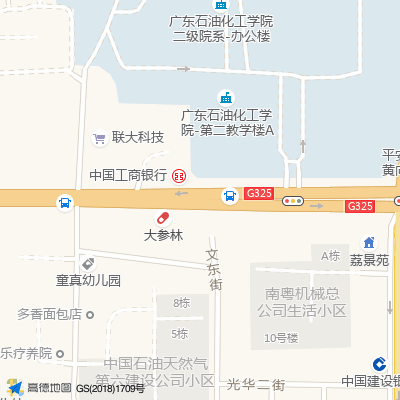

In [69]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_xu,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
staticmap(location=油校_location,zoom=16)

---
## 坐标转换

In [109]:
def assistant(locations:str,coordsys:str):
    params = {
        'key':key_xu,
        'coordsys':coordsys,
        'locations': locations,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params)
    data = response.json()['locations']
    return data
assistant("110.92499782059477,21.678348812949974|110.931788,21.684118",'gps')

'110.929509548612,21.675566677518;110.936314561632,21.681341688369'

### 思考

- 坐标转换功能需要通过算法计算对比不同平台坐标，所以我认为其背后含有ML、AI的功能。

---
## 天气查询

In [97]:
def weather(city:str):
    params = {
        'key':key_xu,
        'city':city,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/weather/weatherInfo?parameters", params)
    data = response.json()
    return data
weather('茂名')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '茂名市',
   'adcode': '440900',
   'weather': '晴',
   'temperature': '24',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '93',
   'reporttime': '2020-04-19 22:52:43'}]}

### 思考

- 天气查询功能只需要调用查询地天气数据，所以我认为其背后不含有ML、AI的功能。

---
## 输入提示

In [98]:
def inputtips(keywords:str):
    params = {
        'key':key_xu,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/inputtips?parameters", params)
    data = response.json()
    return data
inputtips('茂名')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '茂名市',
   'district': '广东省茂名市',
   'adcode': '440902',
   'location': [],
   'address': '茂南区',
   'typecode': '190104',
   'city': []},
  {'id': 'B029C00B1D',
   'name': '茂名站',
   'district': '广东省茂名市茂南区',
   'adcode': '440902',
   'location': '110.929136,21.642081',
   'address': '站北五路1号',
   'typecode': '150200',
   'city': []},
  {'id': 'B029C023EM',
   'name': '茂名西站',
   'district': '广东省茂名市茂南区',
   'adcode': '440902',
   'location': '110.847697,21.680891',
   'address': '油城一路',
   'typecode': '150200',
   'city': []},
  {'id': 'B00156DU7L',
   'name': '茂名南路',
   'district': '上海市黄浦区',
   'adcode': '310101',
   'location': '121.461636,31.216609',
   'address': [],
   'typecode': '190301',
   'city': []},
  {'id': 'B029C01H15',
   'name': '茂名汽车总站',
   'district': '广东省茂名市茂南区',
   'adcode': '440902',
   'location': '110.900204,21.666885',
   'address': '油城三路222号大院',
   'typecode': '150400

### 思考

- 天气查询功能只需要调用查询地天气数据，所以我认为其背后不含有ML、AI的功能。

---
## 交通态势

In [105]:
def rectangle(rectangle:str):
    params = {
        'key':key_xu,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/traffic/status/rectangle?parameters", params)
    data = response.json()
    return data
rectangle('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

### 思考

- 我认为交通态势功能需要将地点坐标通过推荐算法连接后台数据，所以我认为其背后含有ML、AI的功能。

---

# 设计一个简单的应用

应用：一款可以根据路程长短和天气情况推送音乐的APP

具备的功能：
- 可以为用户提供路径规划（路径规划API）
- 可以为用户提供一个实时地图（静态地图API）
- 可以根据当地天气变化推送应景音乐（天气查询）